In [119]:
from extract import SocialETL, construct_query_for_twarc, extract_tags, SocialDB, UserETL
import hashtags as h
import hashtags_readcsv as r_csv
import pandas as pd
import numpy as np
import json
import statistics
import networkx as nx
from numpy import nan

# 1) Download DF

In [55]:
#modifiche: cambiare data e togliere lang eng
m = SocialETL(query="(#strangerthings4 OR #onepiece OR #covid OR #pridemonth OR #grammys OR #justiceforjohnnydepp OR #putin OR #russia OR #ukraine OR #war)", pages=10, recent=False) #strangerthings4 

Output()

## creazione df_base

In [56]:
user_id=m.df['author_id'] 
set_user=set(user_id)
#un utente può aver fatto più di un tweet, in questo modo andiamo a vedere i suoi ultimi tweet solo una volta.
print(len(set_user))

856


In [121]:
hashtag_for_user={}
tweet_for_user={}
retweet_for_user={}
conversation_for_user={}
verified_for_user={}
location_for_user={}

for e in set_user:                                                             #1 pages=20 tweet   
    u=UserETL(e,pages=1)                                                       #aggiungere più pagine (1pag=20)
    #preprocessing hashtag
    u.df=u.df.dropna(subset=['entities.hashtags'])                             #drop nan values on column hashtags
    u.df.reset_index()
    u.df['entities.hashtags']=u.df['entities.hashtags'].apply(eval)            #convert into dict
    u.df["entities.hashtags"] = u.df["entities.hashtags"].map(h.extract_tags)  #extract tags
    hashtag_for_user[e]=u.df["entities.hashtags"].tolist()                     #convert pandas series into a list
    #preprocessing other attributes
    u.df=u.df.dropna(subset=['retweeted_user_id'])
    retweet_for_user[e]=u.df['retweeted_user_id'].tolist()
    conversation_for_user[e]=u.df['conversation_id'].tolist()
    tweet_for_user[e]=u.df['id'].tolist() 
    location_for_user[e]=u.df['author.location'].tolist()
    verified_for_user[e]=u.df['author.verified']

Output()

C:\Users\david\AppData\Local\Temp\ipykernel_7184\382585910.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u.df['entities.hashtags']=u.df['entities.hashtags'].apply(eval)            #convert into dict
C:\Users\david\AppData\Local\Temp\ipykernel_7184\382585910.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u.df["entities.hashtags"] = u.df["entities.hashtags"].map(h.extract_tags)  #extract tags


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [124]:
user_id=[]
tweet_id=[]
hashtag=[]
retweet=[]
location=[]
verified=[]
conversation=[]
for u,h in hashtag_for_user.items():
    user_id.append(u)
    hashtag.append(h)
for u,t in tweet_for_user.items():
    tweet_id.append(t)
for u,r in retweet_for_user.items():
    retweet.append(r)
for u,l in location_for_user.items():
    nest_loc=[]
    for loc in l:
        if str(loc)!='nan':
            nest_loc.append(loc)
        else:
            nest_loc.append('no_loc')
    location.append(nest_loc)
    
for u,v in verified_for_user.items():
    verified.append(v)
for u,c in conversation_for_user.items():
    conversation.append(c)

In [125]:
#create a pandas dataframe
df_nodes=pd.DataFrame({"user_id":user_id,
                       'tweet_id':tweet_id,
                      'retweet_id': retweet,
                       'conversation_id':conversation,
                      "hashtag":hashtag,
                     'location':location,
                     'verified':verified})

In [126]:
#df_nodes['user_id']=df_nodes['user_id'].map(int)
df_nodes['hashtag']=df_nodes['hashtag'].map(str).apply(eval)
df_nodes['tweet_id']=df_nodes['tweet_id'].map(str).apply(eval)
df_nodes['conversation_id']=df_nodes['conversation_id'].map(str).apply(eval)
df_nodes['retweet_id']=df_nodes['retweet_id'].map(str).apply(eval)
df_nodes['location']=df_nodes['location'].map(str).apply(eval)
df_nodes['verified']=df_nodes['verified'].map(str).apply(eval)

SyntaxError: invalid syntax (<string>, line 1)

In [127]:
df_nodes.set_index('user_id',inplace=True)

## preprocessing 

In [128]:
#convert nested lists on set
def to_sets(nested_lists): 
    outer_list = set()
    for el in nested_lists: 
        if type(el) == list: 
            outer_list.update(el) 
        else: 
            outer_list.add(el)
    return outer_list

In [129]:
df_nodes['hashtag']=df_nodes['hashtag'].map(to_sets)
df_nodes['tweet_id']=df_nodes['tweet_id'].map(to_sets)
df_nodes['conversation_id']=df_nodes['conversation_id'].map(to_sets)
df_nodes['retweet_id']=df_nodes['retweet_id'].map(to_sets)
df_nodes['verified']=df_nodes['verified'].map(to_sets)
df_nodes['location']=df_nodes['location'].map(to_sets)

In [130]:
df_nodes.head(3)

tweet_id  \
user_id                                                                  
93217409             {1561774794722480128, 1561764276037029890, 156...   
1198914470086467584  {1561774794722480128, 1561764276037029890, 156...   
370792695            {1561774794722480128, 1561764276037029890, 156...   

                                                            retweet_id  \
user_id                                                                  
93217409             {1437287031743283211, 255493944, 1539146090196...   
1198914470086467584  {1437287031743283211, 255493944, 1539146090196...   
370792695            {1437287031743283211, 255493944, 1539146090196...   

                                                       conversation_id  \
user_id                                                                  
93217409             {1561774794722480128, 1561764276037029890, 156...   
1198914470086467584  {1561774794722480128, 1561764276037029890, 156...   
370792695            {1561774794722480128, 1561764276037029890, 156...   

                                                               hashtag  \
user_id                                                                  
93217409             {, johnnydeppwon, youtube, slovakia, cocks, my...   
1198914470086467584  {, johnnydeppwon, youtube, slovakia, cocks, my...   
370792695            {, johnnydeppwon, youtube, slovakia, cocks, my...   

                                                              location  \
user_id                                                                  
93217409             {Ceredigion, UK, Köln, Deutschland, St-Pierre ...   
1198914470086467584  {Ceredigion, UK, Köln, Deutschland, St-Pierre ...   
370792695            {Ceredigion, UK, Köln, Deutschland, St-Pierre ...   

                          verified  
user_id                             
93217409             {False, True}  
1198914470086467584  {False, True}  
370792695            {False, True}

In [131]:
df_nodes.shape

(856, 6)

In [132]:
#df_nodes.to_csv('df_nodes')

# 2) Categorizzazione utenti

In [133]:
with open('hashtags_300.json', 'r') as f:
    my_dict = json.load(f)

In [134]:
proukr=set()
prorus=set()
pax=set()
for k,v in my_dict.items():
    for e in v:
        if k=='proukr':
            proukr.update(e)
        elif k=='pax':
            pax.update(e)
        elif k=='prorus':
            prorus.update(e)

In [135]:
cat=set.union(proukr,prorus,pax)
count1=0
count4=0
index1=[]
index4=[]

for i, row in enumerate(df_nodes['hashtag']): 
    if row.intersection(cat)==set():#no intersezione   
        #print(row.intersectionn(cat))
        #print("l'utente {}  appartiene alla 4 categoria".format(row.intersection(cat)))
        #print("4 categoria", row)
        count4 += 1
        index4.append(df_nodes.index[i])
        
    else: #c'è intersezione: uno della 3 categorie
        #print("non è la 4 categoria perchè contiene",row.intersection(cat))
       # if row.intersection(proukr)!=set(): #c'è intersez con proukr
            count1 += 1
            index1.append(i) #aggiungo alle rige da tgliere
            print("l'utente {} non  appartiene alla 4 categoria perchè usa {}".format(df_nodes.index[i],row.intersection(cat)))

l'utente 93217409 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'latvia', 'sto

l'utente 3608312063 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'latvia', 's

l'utente 1394803171533414401 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'la

l'utente 1048224526151180288 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'la

l'utente 866172861756489728 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'lat

l'utente 3292784081 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'latvia', 's

l'utente 1687831118 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'latvia', 's

l'utente 3874863388 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'latvia', 's

l'utente 964229880211582976 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'lat

l'utente 1037408429395136512 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'la

l'utente 2797487851 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'l

l'utente 1221305358989381633 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1556702393059909632 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1433649782409416708 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 2607879650 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'l

l'utente 944685994443530243 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russiana

l'utente 1347363403493384193 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1185983892014059520 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1018048470 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'l

l'utente 1480999297491550215 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1495004546640531456 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 2449703372 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'l

l'utente 1112129785902317570 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 2288947266 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'l

l'utente 1371525764936519681 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1518714756319916032 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 240530546 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'la

l'utente 1274460247017402373 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1210098278 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'l

l'utente 1459226858944442370 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 756768120 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'la

l'utente 1545032215 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'l

l'utente 814433073060139010 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russiana

l'utente 1007295161695645696 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1254334113814736897 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1414669490407739397 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1034792222850527232 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1076772025 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'l

l'utente 967147201871929345 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russiana

l'utente 1429442059753201675 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 793486966687932417 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russiana

l'utente 780457261965664257 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russiana

l'utente 1398851952197337094 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 2282555096 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'l

l'utente 1081167035814559744 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1114981456043040769 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1318507461184278533 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1561775088864985088 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1517502152222064641 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1156825478986117120 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1475121516341829638 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1684974319 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'l

l'utente 1523409533300731904 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1451834321468284932 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1521188334118256640 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1132373093358460930 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1457055236137566208 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1554891105295994880 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 544695802 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'la

l'utente 922716079708868608 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russiana

l'utente 1421371427278708742 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1330542082193321984 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 884816843051069440 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russiana

l'utente 1475966677 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'l

l'utente 4066935411 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'l

l'utente 1189660560343863300 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1436545024095784965 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 872101112492544000 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russiana

l'utente 204120920 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'la

l'utente 1380125660 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'l

l'utente 3557179948 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russianarmy', 'l

l'utente 860044806101360640 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russiana

l'utente 1404534858265731073 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1503695007504642051 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1333299931667255298 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1488496011983085578 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1497750953428242432 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1512105595587166209 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1477007230432124934 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1369753673463705605 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1347143186850869258 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 1535687267569762304 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russian

l'utente 798604933775945729 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russiana

l'utente 1361349013027639298 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1354173134446931969 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1431574878 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'rus

l'utente 1220613699448143873 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 299354235 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russ

l'utente 2760047527 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'rus

l'utente 4923120765 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'rus

l'utente 1412317262845923329 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1405615021225299974 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1355149764409647104 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1557357274787729410 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 14341194 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russi

l'utente 1336546703533596672 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 2428521324 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'rus

l'utente 751631120630898688 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'worl

l'utente 1536424795658674183 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1518651461411999746 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1468537186995908610 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 2188145495 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'rus

l'utente 1522373000879755264 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1430214227265007623 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1527893856720547842 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 988914240483360768 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'worl

l'utente 1560390699744481281 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 330196261 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russ

l'utente 1239126606221848577 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1064751509034975233 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1022900814795497472 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1280327304640593921 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1021830850357473280 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1580251428 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'rus

l'utente 1362237984 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'rus

l'utente 18982331 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russi

l'utente 1523257220993064960 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 104141401 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russ

l'utente 1140108673 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'rus

l'utente 1379974448481136642 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 753686714594500608 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'worl

l'utente 1330576948981092353 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1221513442651181056 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1441367000085786631 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 29301805 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russi

l'utente 1865436241 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'rus

l'utente 1344010579225305090 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1206142204923633665 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1254408510357540864 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1244701547721826304 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1497950696444141570 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1521043017104302080 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1561743039047008259 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1340972235255898112 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1515128573518131207 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 53034192 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'world', 'russi

l'utente 1380423359943610370 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 'onev1', 'wor

l'utente 1495177161149276163 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 1505794133369180164 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 2298882024 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron',

l'utente 1552253250878971906 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 2597198659 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron',

l'utente 1444137364268339204 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 1521446405226864640 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 1530675498006654982 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 1501841920217296901 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 1361768369100181506 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 1414855297370308608 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 175169914 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 

l'utente 1507704166394871808 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 218658852 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 

l'utente 1497913157418946561 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 1510344692449300489 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 1728932216 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron',

l'utente 1541458906865614848 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 1548272807628312579 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 1335598529587372033 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 904033152 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 

l'utente 1260834018569920513 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 456898160 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 

l'utente 935734795639967745 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', '

l'utente 1032843521663885312 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 1261220991725744129 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 2288850691 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron',

l'utente 3309582003 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron',

l'utente 1433203867622146048 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 887561521 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 

l'utente 2483821237 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron',

l'utente 1298782035293671430 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 2498243524 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron',

l'utente 983078888166379520 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', '

l'utente 883960508541542400 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', '

l'utente 836650664 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 

l'utente 929111392980033536 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', '

l'utente 1496809837254123520 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 74962376 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', '

l'utente 3488416033 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron',

l'utente 107663008 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 

l'utente 899952481 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 

l'utente 487564043 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron', 

l'utente 1300508240099315713 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 1318096691468341250 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 2906036421 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron',

l'utente 2813646301 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron',

l'utente 1430635325991256065 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 1136745114796269577 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 3233164824 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 'macron',

l'utente 1248685317378519042 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 705292242441867264 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', '

l'utente 1323640256558731264 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 1524853802305724418 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine', 

l'utente 1151202637582348294 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerr

l'utente 3065176599 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukrain

l'utente 1273034509143822336 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerr

l'utente 912033742109265922 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerre

l'utente 1317486556463190016 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerr

l'utente 2406900582 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukrain

l'utente 1547931999167397889 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerr

l'utente 290230999 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerreenukraine

l'utente 1337544667991314433 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerr

l'utente 1478787050660761600 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontshop', 'guerr

l'utente 1063646352117252096 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1542591295159693313 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 582243157 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsh

l'utente 1281300624311607296 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1410143310002360320 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1318716510 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 2394640485 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 1513646049566642184 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 261743206 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsh

l'utente 1511472580317876224 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 2243487176 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 1497910124274462721 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1327134525328121856 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1281618367246458880 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 2182402151 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 1240332676336410624 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1092544026 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 287359232 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsh

l'utente 115221466 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsh

l'utente 1090619516801990656 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 924265598066020352 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'ad

l'utente 1371508072263286784 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 764631009174310913 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'ad

l'utente 2432816110 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 1463719226326323206 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1431022568908083203 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1510683539322421249 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1101591554559541250 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 330485807 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsh

l'utente 1544366790469459971 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1450120905661747210 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1093515983661215749 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1476616835848015874 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 869977212224655365 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'ad

l'utente 700050382 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsh

l'utente 1164815041473871873 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 823473732245065728 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'ad

l'utente 114690451 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsh

l'utente 1520353537162682370 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 4503160513 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 482241563 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsh

l'utente 1392414576579334145 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 840655506695938048 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'ad

l'utente 1441552583361851402 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 787881938941902848 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'ad

l'utente 1500510730180833287 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1551610683087028226 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 2356293500 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 1496859161266728967 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1446339647785816096 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1242015180 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 2804109824 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 745480699 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsh

l'utente 19645116 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsho

l'utente 816583746673577984 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'ad

l'utente 1451587682283499521 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 707492720160321536 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'ad

l'utente 1501950551335915520 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 221699666 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsh

l'utente 175005562 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsh

l'utente 1438212406635810817 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1166820769 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 884205517786185732 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'ad

l'utente 1496670053391081481 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 3946976667 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 890892091 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsh

l'utente 1733050502 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 700597078649507840 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'ad

l'utente 732279903589007360 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'ad

l'utente 2356310243 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 119906415 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsh

l'utente 462032562 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsh

l'utente 1081565128733138944 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 743468493996236800 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'ad

l'utente 71298686 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsho

l'utente 1486459313732259840 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 160812512 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdontsh

l'utente 1583321544 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 750316854053339136 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'ad

l'utente 775217961187454976 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'ad

l'utente 2869401167 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'adoptdonts

l'utente 1457077896565207042 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 'a

l'utente 1284946404935438338 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 29234408 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 

l'utente 1497962179257118728 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1142843515568820229 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1399282887598350342 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1483611368829992964 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1300799465264041992 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1197234761217036289 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 341463366 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders',

l'utente 1063942566 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 1523424212752416769 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 15065497 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 

l'utente 1495131422616698888 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 2248783488 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 1202232039451365376 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 346678505 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders',

l'utente 24150568 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 

l'utente 2902839158 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 786516154361651200 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'de

l'utente 62883665 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 

l'utente 1205118298280615936 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1535121840183513089 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1141436295371059201 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1254743442841837568 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1551562281460371457 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1518949652254666752 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1499884341190664194 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 179441419 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders',

l'utente 820556544035069952 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'de

l'utente 1533535642264666112 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 2273903324 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 14968867 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders', 

l'utente 1561699334433001476 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 755687306078609408 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'de

l'utente 2420100298 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 843923118213206017 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'de

l'utente 995959326505226241 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'de

l'utente 1498370722997096456 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 760311925787926528 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'de

l'utente 1452392355336794115 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1110965573851078656 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 885962054808555520 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'de

l'utente 4726111275 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 3189042450 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 1092786075204894720 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 917133702 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders',

l'utente 1034981486 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 340476927 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders',

l'utente 1105821982933708800 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1438193592334536711 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 137414822 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders',

l'utente 902415562827026432 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'de

l'utente 367566662 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders',

l'utente 1183572053124730881 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1381318755477753857 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 262101606 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders',

l'utente 1518943414812819456 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 712876921 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders',

l'utente 278750925 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders',

l'utente 1397606189924487171 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 764889218078433280 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'de

l'utente 226759686 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders',

l'utente 2863551224 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 1123952065342914560 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 209492244 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders',

l'utente 1434551700531122186 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1300794480098971651 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 3577433472 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 1558405035557638144 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 2849064914 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 588097287 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders',

l'utente 953874531395006464 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'de

l'utente 1324718578952790016 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1393544046753292288 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1426342934010601474 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 2990204053 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 1125443593085358082 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1074611435702050817 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1556573800636059648 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1314901204170952705 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1011609743440433153 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 2608133516 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 1546246427671683073 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 818277589588541440 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'de

l'utente 1558074222932639744 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 2697023638 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 992446595286421504 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'de

l'utente 2910308290 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 1401445522087370753 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1979247318 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 575698060 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders',

l'utente 897181004150046720 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'de

l'utente 1299598339692847104 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 3042061978 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'defenders'

l'utente 1513026077177700353 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1252809712573153280 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1524114862695227393 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

l'utente 1051705188073914368 non  appartiene alla 4 categoria perchè usa {'toryfascistdictatorship', 'refugees', 'humanitarian', 'polska', 'climatecrisis', 'un', 'unitednations', 'fellas', 'nftcollector', 'dogsoftwitter', 'onu', 'gorlovka', 'usa', 'russianterrorists', 'torycorruption', 'stoprussia', 'atgm', 'italia', 'putinwarcriminal', 'kharkiv', 'army', 'azov', 'war', 'ukrayna', 'scholz', 'etc', 'sweden', 'fcknzs', 'covid_19', 'putinswar', 'canada', 'schroder', 'paris', 'fundraising', 'ukrainewar', 'bbcnews', 'stopwarinukraine', 'taiwan', 'italy', 'putinwarcrimes', 'finland', 'deutschland', 'cats', 'kyiv', 'wtpblue', 'stopputin', 'russian', 'russiancolonialism', 'promotion', 'guerra', 'helpukraine', 'fsb', 'freeazovstaldefenders', 'nftartist', 'wearenafo', 'ukrainiens', 'moscow', 'biden', 'video', 'olenivka', 'ukrainians', 'ai', 'artist', 'europe', 'united24', 'putinisawarcriminal', 'melitopol', 'atacms', 'iranian', 'democracy', 'ukrainerussia', 'texas', 'russiaisaterroriststate', 'd

In [136]:
print('nocare = {} \n'
      'altre categorie = {}'.format(count4, count1))

nocare = 0 
altre categorie = 856


In [137]:
df_nodes['cat']="war cat"#pd.NA
for i in index4:
    df_nodes['cat'].loc[i]='nocare'

# 3 Creazione rete

In [138]:
#df_nodes['location']=df_nodes['location'].map(list)

In [139]:
f={True}
for b in df_nodes['verified']:
    if b.intersection(f)!=set():
        b.discard(False)

In [140]:
G = nx.Graph()
g= list(df_nodes.index)#['user_id'])
G.add_nodes_from(g)#, cat=df_nodes['cat'][i], verfied=''.join(str(i) for i in df_nodes['verified'][i])) # ,loc=df_nodes['location'][i], verfied=df_nodes['verified'][i])
list(G.nodes.data())

[('93217409', {}),
 ('1198914470086467584', {}),
 ('370792695', {}),
 ('1228450791385698304', {}),
 ('3608312063', {}),
 ('1178622672680259584', {}),
 ('1498842097423720449', {}),
 ('828270302803140611', {}),
 ('1394803171533414401', {}),
 ('1430036513346269204', {}),
 ('926449520535318528', {}),
 ('1422093336614248448', {}),
 ('1048224526151180288', {}),
 ('1518756238066176000', {}),
 ('1447873525411454978', {}),
 ('1388883571620728832', {}),
 ('866172861756489728', {}),
 ('1216396694969102336', {}),
 ('1496342531667279872', {}),
 ('838321345570156545', {}),
 ('3292784081', {}),
 ('887697108249137152', {}),
 ('919090888042672128', {}),
 ('1489899626', {}),
 ('1687831118', {}),
 ('1891794871', {}),
 ('1505916859455057920', {}),
 ('776838704925069312', {}),
 ('3874863388', {}),
 ('728389458899423232', {}),
 ('717326072', {}),
 ('1272217799771987970', {}),
 ('964229880211582976', {}),
 ('1325628687379804162', {}),
 ('1062056685873913856', {}),
 ('1556955529297252352', {}),
 ('10374084293

In [141]:
#crea edges tra nodi
#tentativo 1
index=[]
for i in df_nodes.index:
    index.append({str(i)})
print(len(index))

856


In [142]:
#link retweet
list_edges=[]
for u in index:
    th=0
    #print('u',u, type(u))
    for i,ret in enumerate(df_nodes['retweet_id']):
        #print('ret',ret)
        w=0
        if ret.intersection(u)!=set() and ''.join(str(i) for i in u)!=df_nodes.index[i]: 
            w += 1
            th += 1
            #
            if th >=1:
            #print('user {u} compare nei retweet di ',.format(u,df_nodes.index[i])
                list_edges.append({'from':''.join(str(i) for i in u),
                               'to':df_nodes.index[i],
                               'weight':w})
print(len(list_edges))

41665


In [143]:
print(list_edges)

[{'from': '1556417687479271424', 'to': '93217409', 'weight': 1}, {'from': '1556417687479271424', 'to': '1198914470086467584', 'weight': 1}, {'from': '1556417687479271424', 'to': '370792695', 'weight': 1}, {'from': '1556417687479271424', 'to': '1228450791385698304', 'weight': 1}, {'from': '1556417687479271424', 'to': '3608312063', 'weight': 1}, {'from': '1556417687479271424', 'to': '1178622672680259584', 'weight': 1}, {'from': '1556417687479271424', 'to': '1498842097423720449', 'weight': 1}, {'from': '1556417687479271424', 'to': '828270302803140611', 'weight': 1}, {'from': '1556417687479271424', 'to': '1394803171533414401', 'weight': 1}, {'from': '1556417687479271424', 'to': '1430036513346269204', 'weight': 1}, {'from': '1556417687479271424', 'to': '926449520535318528', 'weight': 1}, {'from': '1556417687479271424', 'to': '1422093336614248448', 'weight': 1}, {'from': '1556417687479271424', 'to': '1048224526151180288', 'weight': 1}, {'from': '1556417687479271424', 'to': '15187562380661760

In [147]:
#link retweet

list_edges=[]
for t,tweet in enumerate(df_nodes['tweet_id']):
    count=0
    #print('t',t, type(t))
    for c,comment in enumerate(df_nodes['conversation_id']):
        #print('ret',ret)
        if tweet.intersection(comment)!=set(): 
            count += 1 
            if count>len(df_nodes[c]['conversation_id'])/2:
                list_edges.append({'from':df_nodes.index[t],
                               'to':df_nodes.index[c]})
print(len(list_edges))

KeyError: 0

In [144]:
#add weights: how many times one tweet's user is twetted by an user
edges=[(x["from"], x["to"]) for x in list_edges]
#print(edges)
G.add_edges_from(edges)

In [145]:
G.remove_edges_from(list(nx.selfloop_edges(G)))
G.remove_nodes_from(list(nx.isolates(G)))

number of nodes = 856 , number of edges = 40500 . number of components = 1


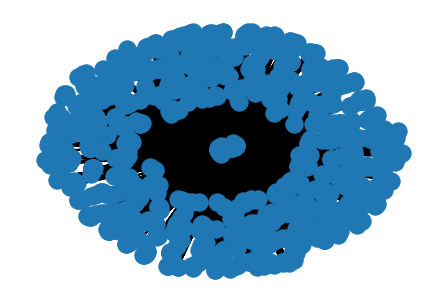

In [146]:
c=0
for component in list(nx.connected_components(G)):
    c += 1
nx.draw(G)
print('number of nodes =',G.number_of_nodes(),', number of edges =', G.number_of_edges(),'. number of components =',c) 

In [148]:
nx.write_gexf(G,'net with 5 retweet.gexf')
#nx.write_gexf(G,'net_50')

In [85]:
for component in list(nx.connected_components(G)):
    c += 1
    if len(component)<10:
        for node in component:
            G.remove_node(node)

number of nodes = 0 , number of edges = 0 . number of components = 0


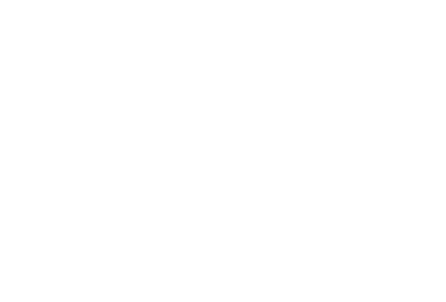

In [86]:
c=0
for component in list(nx.connected_components(G)):
    c += 1
nx.draw(G)
print('number of nodes =',G.number_of_nodes(),', number of edges =', G.number_of_edges(),'. number of components =',c) 

In [43]:
from matplotlib import pylab
def save_graph(graph, file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(40, 40))
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    
save_graph(G,'g')
print('number of nodes = ', G.number_of_nodes(),
     'number of edges = ', G.number_of_edges())

NameError: name 'plt' is not defined

In [73]:
c=0
for component in list(nx.connected_components(G)):
    c += 1
print(c)

3


In [78]:
G.number_of_nodes()

719